<a href="https://colab.research.google.com/github/Elish-Ab/Brent-Oil-Price-Prediction/blob/main/notebooks/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install statsmodels arch

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

In [3]:
df = pd.read_csv('Brent_Oil_Prices.csv')

In [4]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


<ipython-input-5-353fc62157b2>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
<ipython-input-5-353fc62157b2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


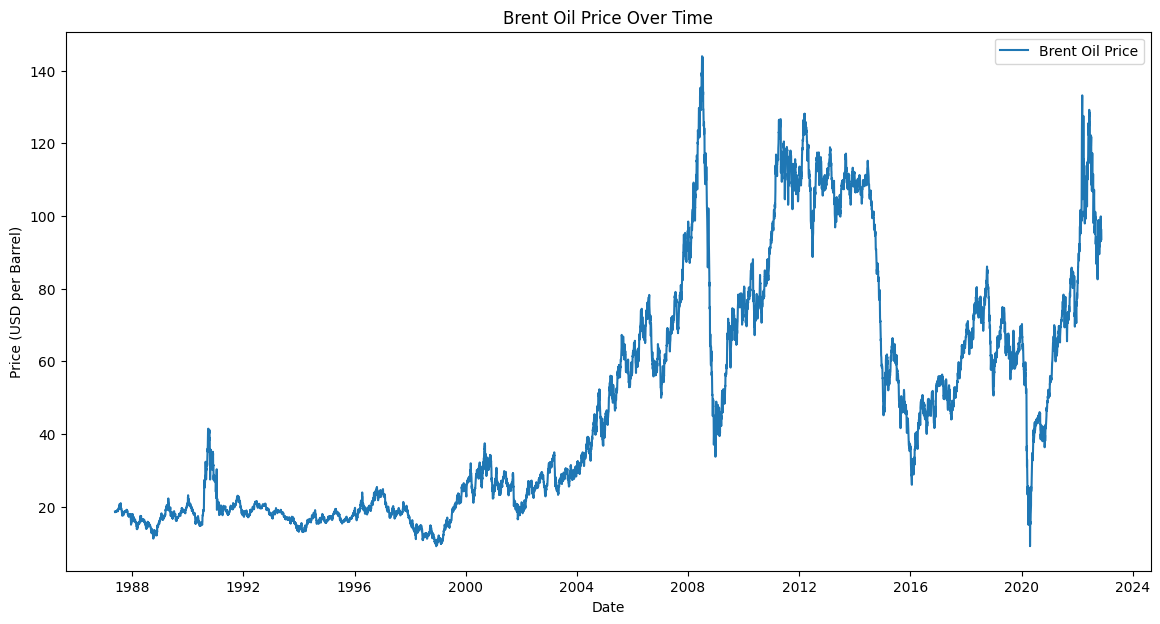

In [5]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.set_index('Date', inplace=True)

# Check for missing values and handle them
df = df.dropna()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df['Price'], label='Brent Oil Price')
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.show()

In [8]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the p-value > 0.05, difference the series
if result[1] > 0.05:
    df['Price_diff'] = df['Price'].diff().dropna()

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


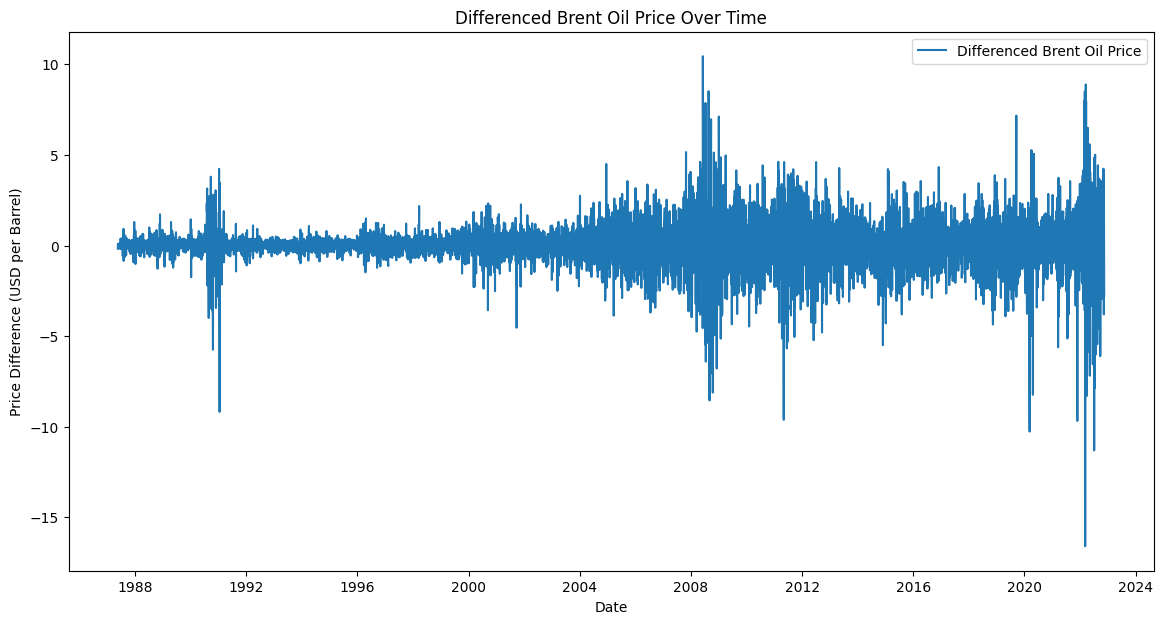

ADF Statistic after differencing: -15.52936758004802
p-value after differencing: 2.230740510516298e-28


In [9]:
# Difference the time series
df['Price_diff'] = df['Price'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(14, 7))
plt.plot(df['Price_diff'], label='Differenced Brent Oil Price')
plt.title('Differenced Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price Difference (USD per Barrel)')
plt.legend()
plt.show()

# Re-run the Augmented Dickey-Fuller test
result_diff = adfuller(df['Price_diff'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9010
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14542.824
Date:                Mon, 04 Nov 2024   AIC                          29091.648
Time:                        14:23:34   BIC                          29112.966
Sample:                             0   HQIC                         29098.902
                               - 9010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4779      0.008    184.550      0.0

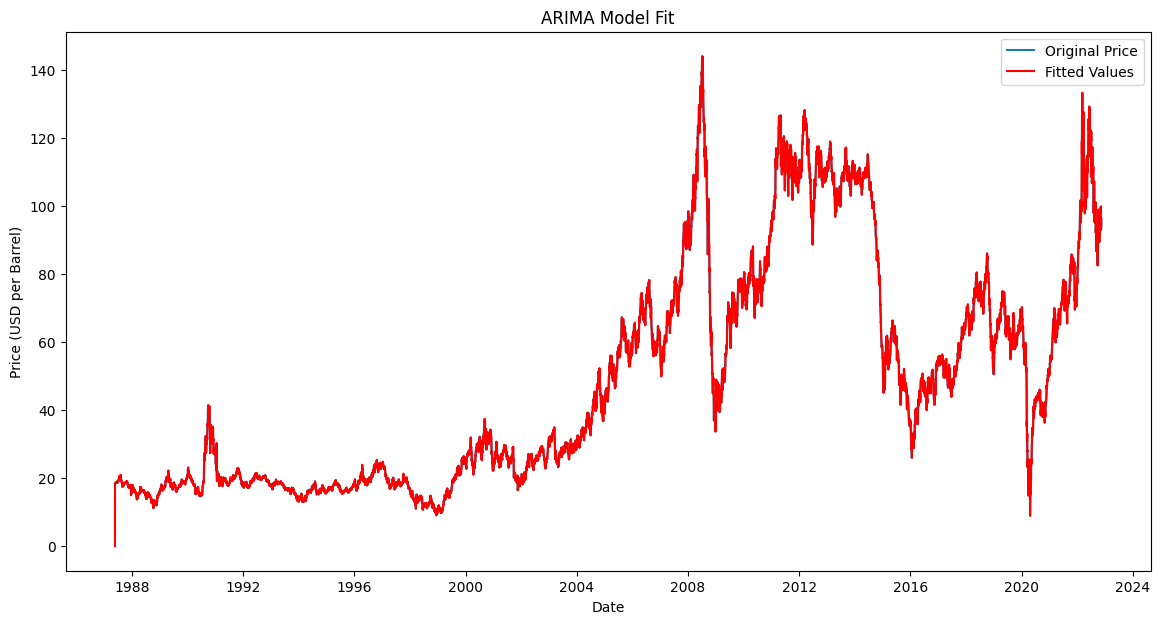

In [16]:
# Fit an ARIMA model
model = ARIMA(df['Price'], order=(1, 1, 1))  # (p, d, q) where d=1 as we've differenced once
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot the model's fit
plt.figure(figsize=(14, 7))
plt.plot(df['Price'], label='Original Price')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.show()
